# Proceso de QA

## Segunda parte: Evaluación de respuestas

### Se usará los resultados generados en: QA--Generación de respuestas-comercial: comercial_todas_v4.json

El objetivo de esta sección es evaluar las respuestas generadas por distintos prompts.

__Requisitos:__ Importamos las siguientes librerías

In [1]:
import sys
sys.path.append('../lib')

import qagenevaluation as qaeval
import qagraphutils as qagraph

__Paso 1:__ Seleccionamos algunos archivos para evaluar

En nuestro caso seleccionaremos: _comercial_todas_v4.json_ que contiene respuestas generadas:

- sales_copilot_v1
  - simple_sales_copilot_v1
  - bauchat_english_sales_copilot_v1
  - bauchat_spanish_sales_copilot_v1
- comercial_txt_1
  - simple_comercial_txt_1
  - bauchat_english_comercial_txt_1
  - bauchat_spanish_comercial_txt_1
- comercial_txt_2
  - simple_comercial_txt_2
  - bauchat_english_comercial_txt_2
  - bauchat_spanish_comercial_txt_2
- comercial_pdf_1
  - simple_comercial_pdf_1
  - bauchat_english_comercial_pdf_1
  - bauchat_spanish_comercial_pdf_1


In [2]:
filename_to_eval = "comercial_todas_v4.json"

Notar que estaremos generando las siguientes evaluaciones:

- Compararemos prompts para cada uno de los índices sales_copilot_v1, comercial_txt_1, comercial_txt_2 y comercial_pdf_1:   
  - simple vs bauchat_english
  - simple vs bauchat_spanish
  - bauchat_english vs bauchat_spanish

- Compararemos índices:
  - simple_sales_copilot_v1 vs simple_comercial_txt_1
  - simple_sales_copilot_v1 vs simple_comercial_txt_2
  - simple_sales_copilot_v1 vs simple_comercial_pdf_1
  - simple_comercial_txt_1 vs simple_comercial_txt_2
  - simple_comercial_txt_1 vs simple_comercial_pdf_1
  - simple_comercial_txt_2 vs simple_comercial_pdf_1
  
  - bauchat_english_sales_copilot_v1 vs bauchat_english_comercial_txt_1
  - bauchat_english_sales_copilot_v1 vs bauchat_english_comercial_txt_2
  - bauchat_english_sales_copilot_v1 vs bauchat_english_comercial_pdf_1
  - bauchat_english_comercial_txt_1 vs bauchat_english_comercial_txt_2
  - bauchat_english_comercial_txt_1 vs bauchat_english_comercial_pdf_1
  - bauchat_english_comercial_txt_2 vs bauchat_english_comercial_pdf_1
  
  - bauchat_spanish_sales_copilot_v1 vs bauchat_spanish_comercial_txt_1
  - bauchat_spanish_sales_copilot_v1 vs bauchat_spanish_comercial_txt_2
  - bauchat_spanish_sales_copilot_v1 vs bauchat_spanish_comercial_pdf_1
  - bauchat_spanish_comercial_txt_1 vs bauchat_spanish_comercial_txt_2
  - bauchat_spanish_comercial_txt_1 vs bauchat_spanish_comercial_pdf_1
  - bauchat_spanish_comercial_txt_2 vs bauchat_spanish_comercial_pdf_1

__Paso 2:__ Procedemos a generar la evaluación usando solamente Azure Open AI para mayores detalles revisar qaoaievalutils

In [ ]:
# Suponemos que `qaeval` es un módulo previamente definido e importado
# que tiene una función `evaluate_responses`.

# Lista para almacenar los resultados de todas las ejecuciones
eval_results = []

# Lista de índices para los que se realizarán las comparaciones
indices = ["sales_copilot_v1", "comercial_txt_1", "comercial_txt_2", "comercial_pdf_1"]

# Bucle para cada índice
for index in indices:
    
    # simple vs bauchat_english
    result = qaeval.evaluate_responses(
        filename_to_eval=filename_to_eval,
        response_a_field=f"simple_{index}",
        response_b_field=f"bauchat_english_{index}",
        filename_result=f"comercial_{index}_simple_vs_bauchat_english.json",
        all_numeric=True
    )
    eval_results.append(result)
    
    # simple vs bauchat_spanish
    result = qaeval.evaluate_responses(
        filename_to_eval=filename_to_eval,
        response_a_field=f"simple_{index}",
        response_b_field=f"bauchat_spanish_{index}",
        filename_result=f"comercial_{index}_simple_vs_bauchat_spanish.json",
        all_numeric=True
    )
    eval_results.append(result)
    
    # bauchat_english vs bauchat_spanish
    result = qaeval.evaluate_responses(
        filename_to_eval=filename_to_eval,
        response_a_field=f"bauchat_english_{index}",
        response_b_field=f"bauchat_spanish_{index}",
        filename_result=f"comercial_{index}_bauchat_english_vs_bauchat_spanish.json",
        all_numeric=True
    )
    eval_results.append(result)

In [3]:
eval_results = [
    "comercial_comercial_pdf_1_bauchat_english_vs_bauchat_spanish.json",
    "comercial_comercial_pdf_1_simple_vs_bauchat_spanish.json",
    "comercial_comercial_pdf_1_simple_vs_bauchat_english.json",
    "comercial_comercial_txt_2_bauchat_english_vs_bauchat_spanish.json",
    "comercial_comercial_txt_2_simple_vs_bauchat_spanish.json",
    "comercial_comercial_txt_2_simple_vs_bauchat_english.json",
    "comercial_comercial_txt_1_bauchat_english_vs_bauchat_spanish.json",
    "comercial_comercial_txt_1_simple_vs_bauchat_spanish.json",
    "comercial_comercial_txt_1_simple_vs_bauchat_english.json",
    "comercial_sales_copilot_v1_bauchat_english_vs_bauchat_spanish.json",
    "comercial_sales_copilot_v1_simple_vs_bauchat_spanish.json",
    "comercial_sales_copilot_v1_simple_vs_bauchat_english.json"
]

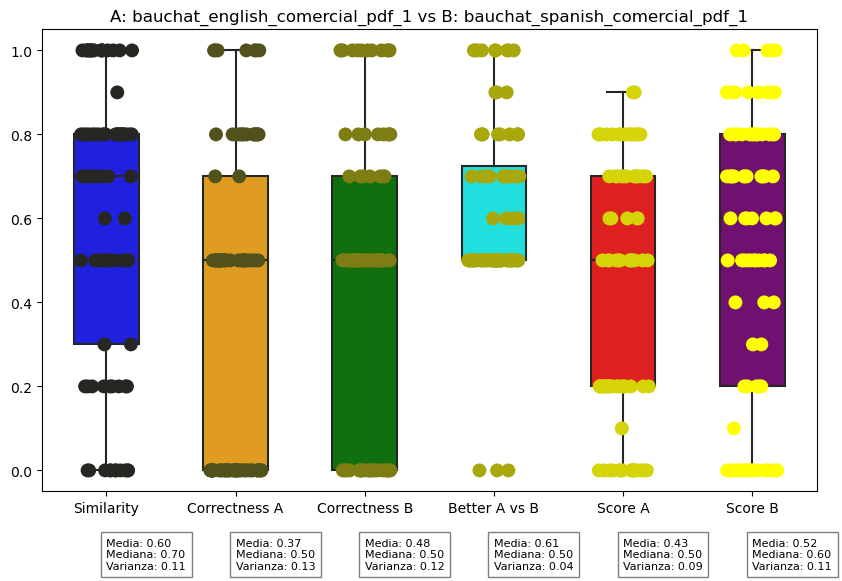

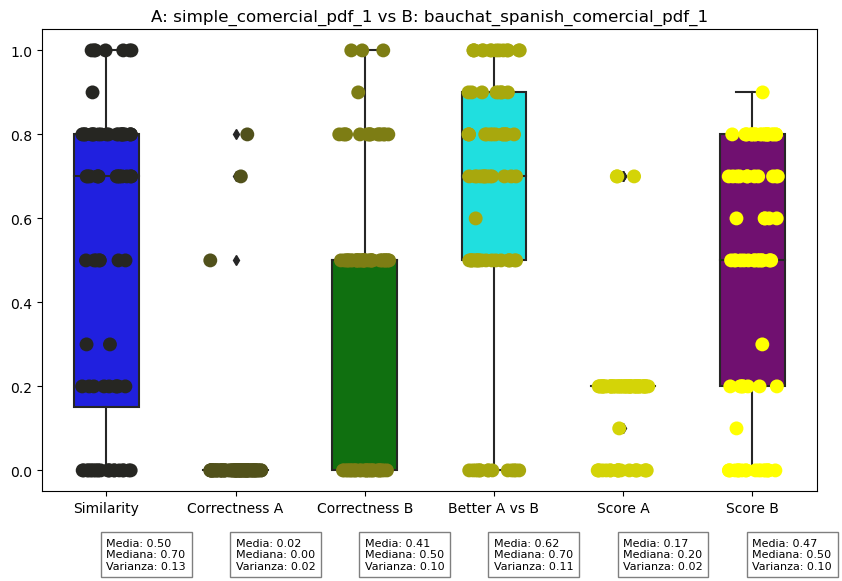

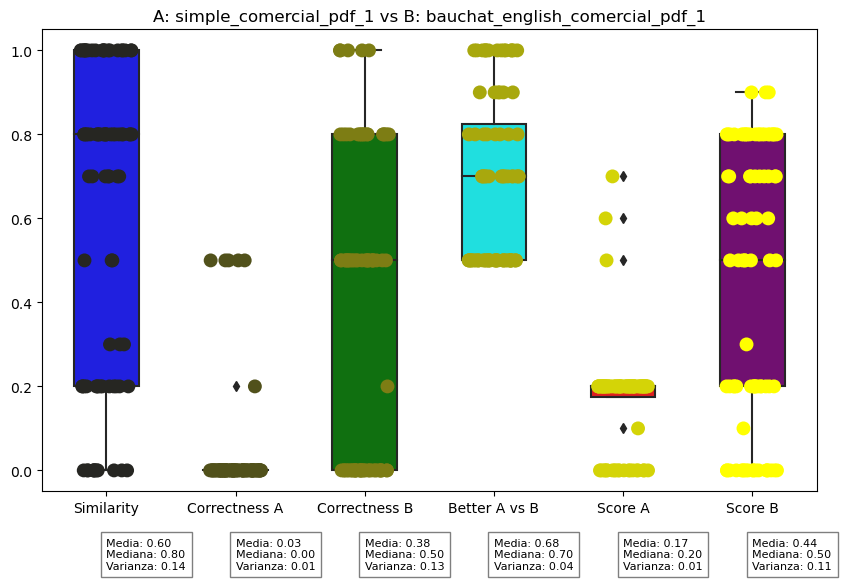

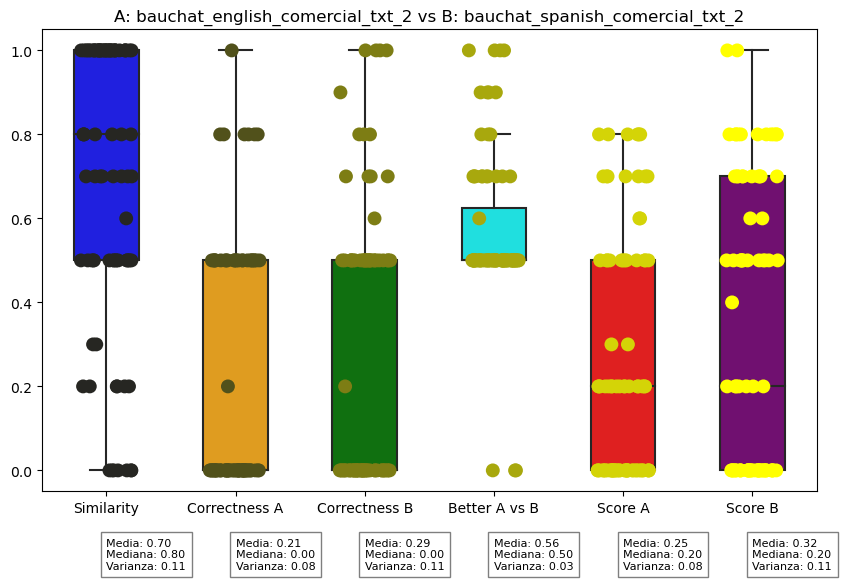

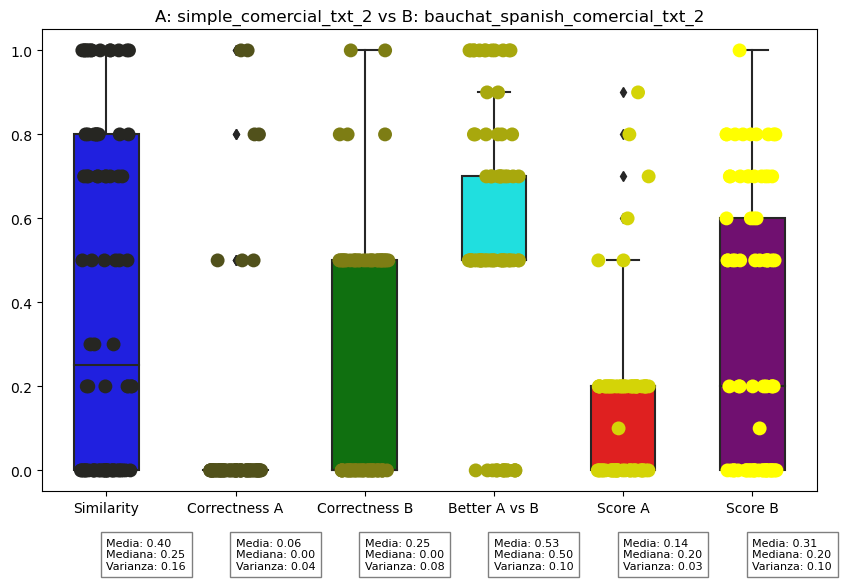

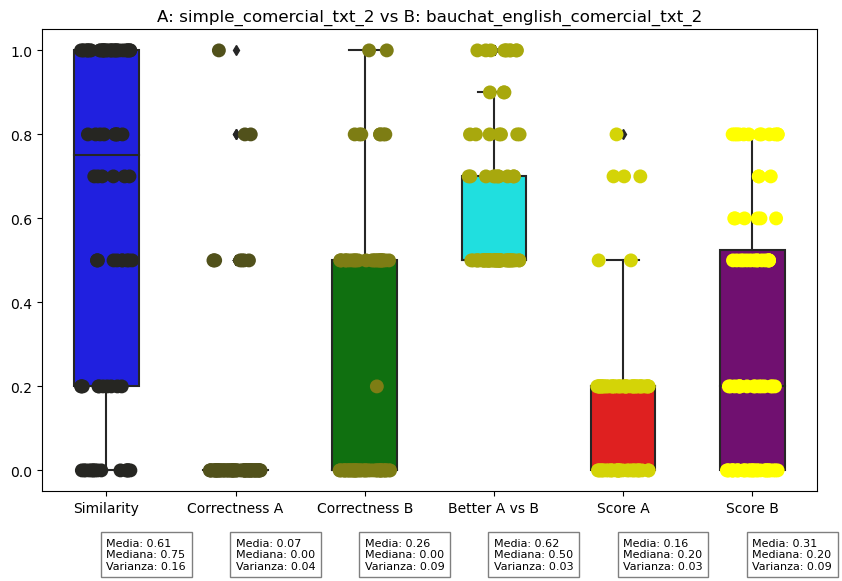

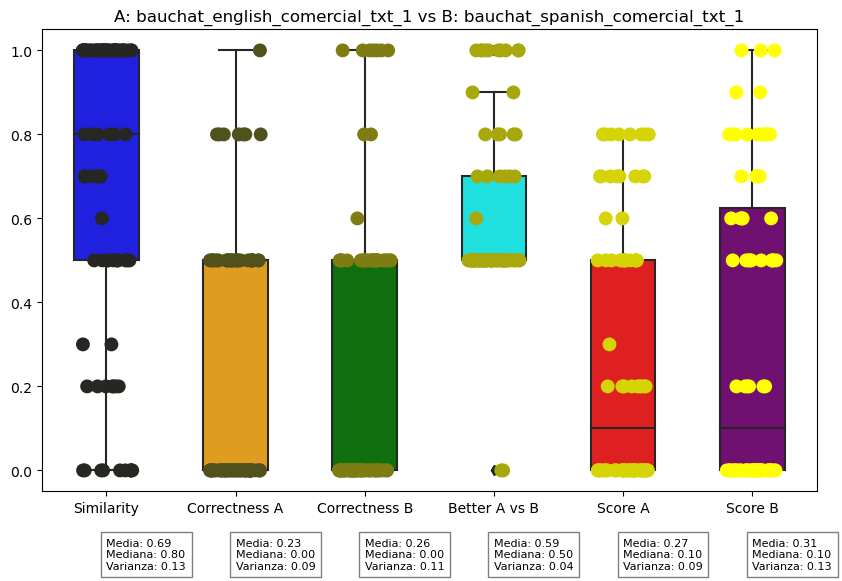

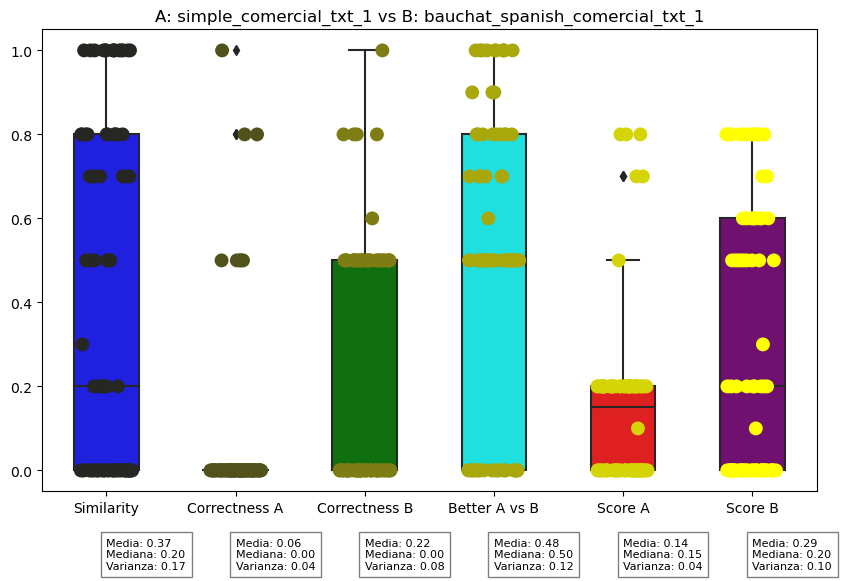

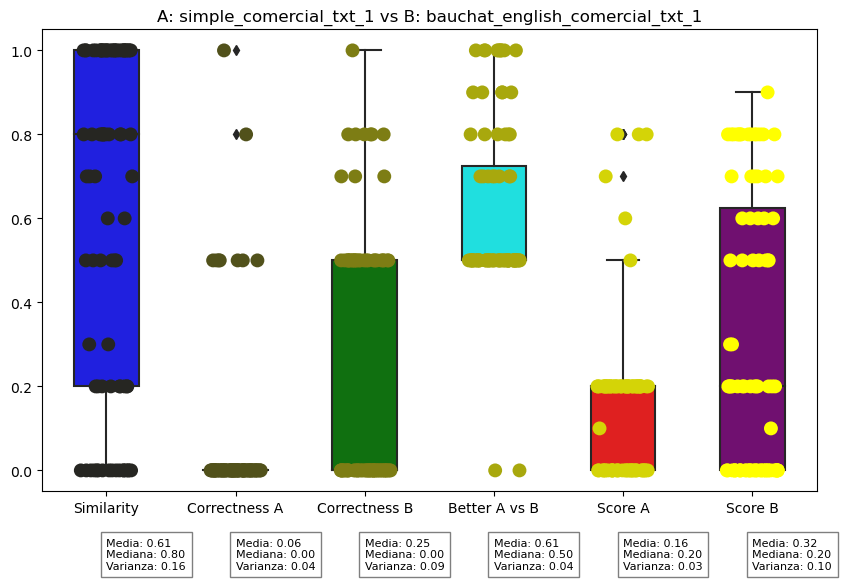

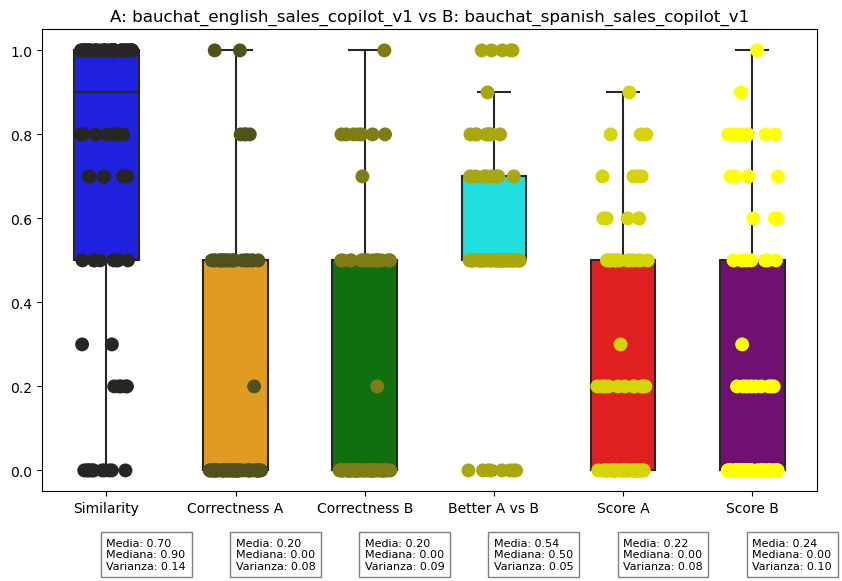

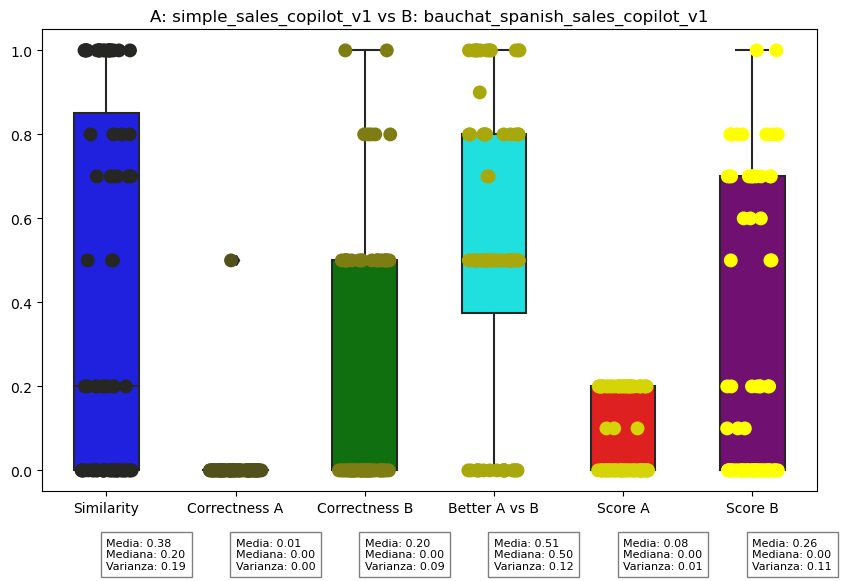

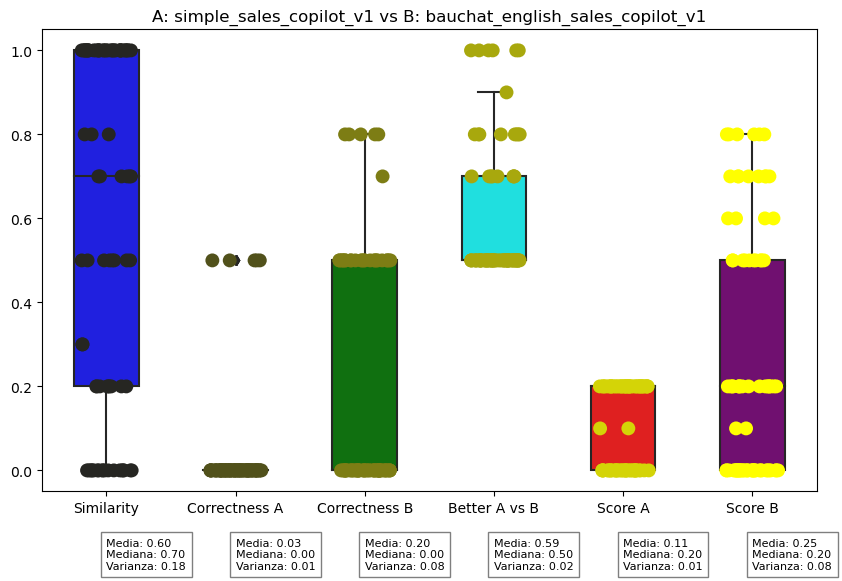

In [4]:
for eval_result in eval_results:
    qagraph.show_all_numeric_evaluate_responses_as_box_graph(filename_to_eval=eval_result)


In [7]:
# Suponemos que `qaeval` es un módulo previamente definido e importado
# que tiene una función `evaluate_responses`.

# Lista para almacenar los resultados de todas las ejecuciones
eval_results_vs_index = []

# Índices para los que se realizarán las comparaciones
indices = ["sales_copilot_v1", "comercial_txt_1", "comercial_txt_2", "comercial_pdf_1"]

# Tipos de comparaciones a realizar
types = ["simple", "bauchat_english", "bauchat_spanish"]

# Bucle para cada tipo de comparación
for type in types:
    # Comparaciones entre índices distintos para el mismo tipo
    for i in range(len(indices)):
        for j in range(i + 1, len(indices)):
            # Genera los nombres de campo para la comparación
            response_a_field = f"{type}_{indices[i]}"
            response_b_field = f"{type}_{indices[j]}"
            # Realiza la evaluación y guarda el resultado
            filename_eval_result = f"{response_a_field}_vs_{response_b_field}.json"
            print(f"Evaluating : {filename_eval_result}")
            result = qaeval.evaluate_responses(
                filename_to_eval=filename_to_eval,
                response_a_field=response_a_field,
                response_b_field=response_b_field,
                filename_result=filename_eval_result,
                all_numeric=True
            )
            eval_results_vs_index.append(result)

# Al final, `eval_results` contiene todos los resultados
print(eval_results_vs_index)


Evaluating : simple_sales_copilot_v1_vs_simple_comercial_txt_1.json
Evaluating : simple_sales_copilot_v1_vs_simple_comercial_txt_2.json
Evaluating : simple_sales_copilot_v1_vs_simple_comercial_pdf_1.json
Evaluating : simple_comercial_txt_1_vs_simple_comercial_txt_2.json
Evaluating : simple_comercial_txt_1_vs_simple_comercial_pdf_1.json
Evaluating : simple_comercial_txt_2_vs_simple_comercial_pdf_1.json
Evaluating : bauchat_english_sales_copilot_v1_vs_bauchat_english_comercial_txt_1.json
Evaluating : bauchat_english_sales_copilot_v1_vs_bauchat_english_comercial_txt_2.json
Evaluating : bauchat_english_sales_copilot_v1_vs_bauchat_english_comercial_pdf_1.json
Evaluating : bauchat_english_comercial_txt_1_vs_bauchat_english_comercial_txt_2.json
Evaluating : bauchat_english_comercial_txt_1_vs_bauchat_english_comercial_pdf_1.json
Evaluating : bauchat_english_comercial_txt_2_vs_bauchat_english_comercial_pdf_1.json
Evaluating : bauchat_spanish_sales_copilot_v1_vs_bauchat_spanish_comercial_txt_1.j

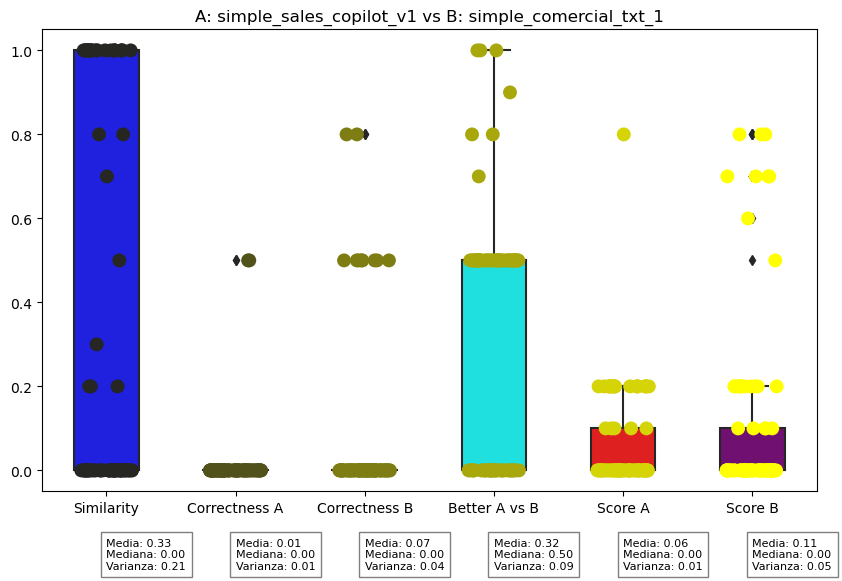

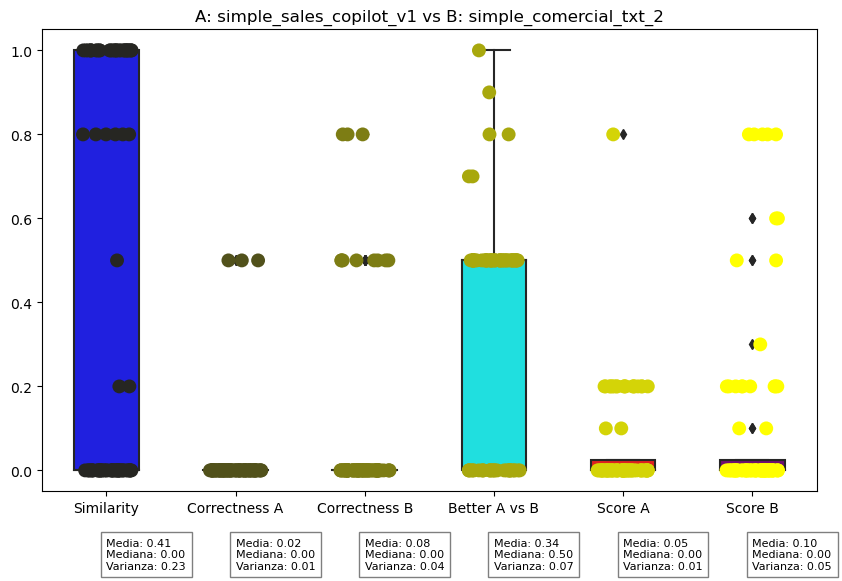

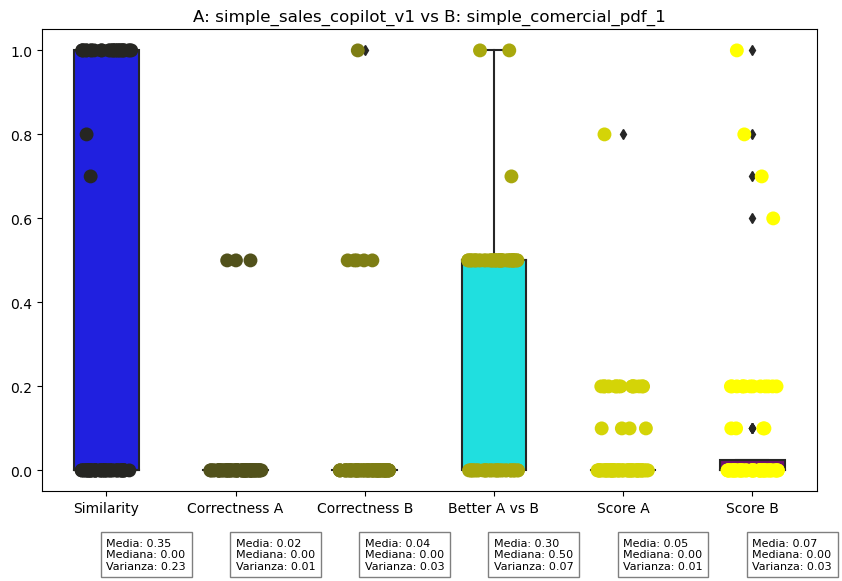

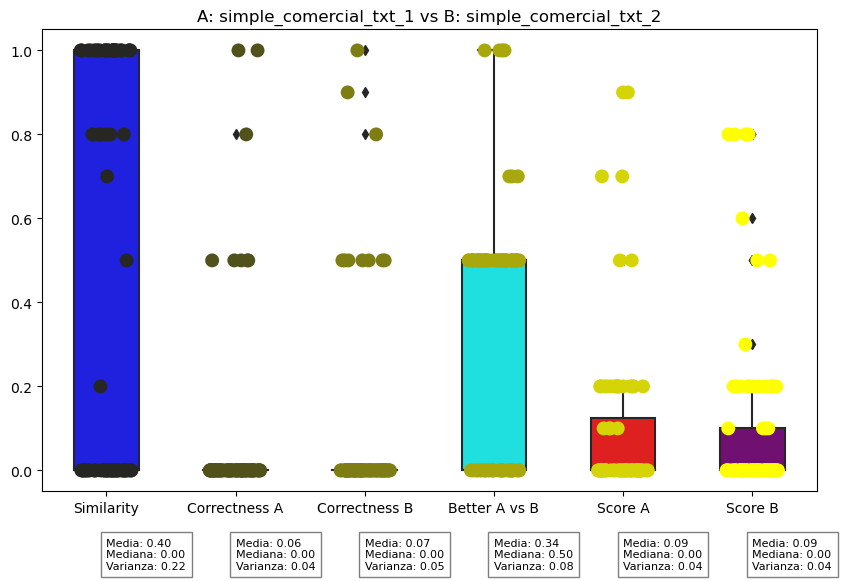

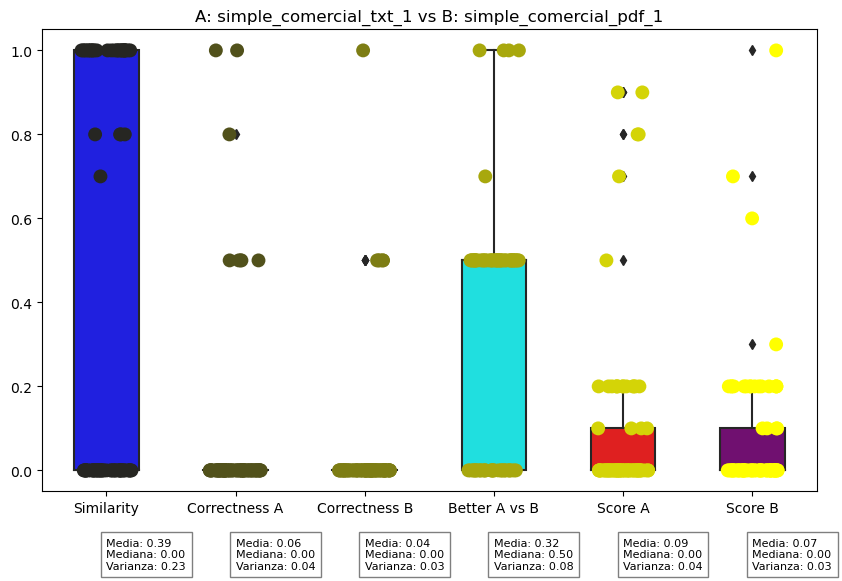

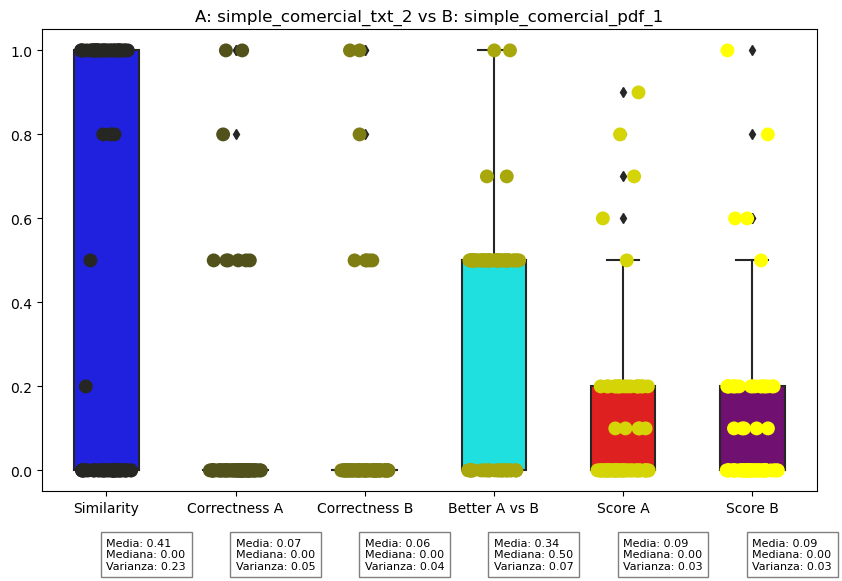

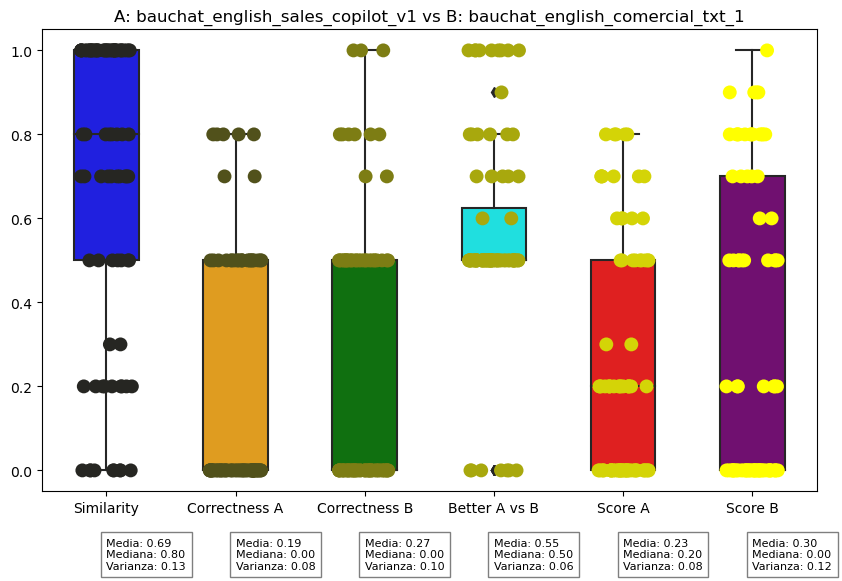

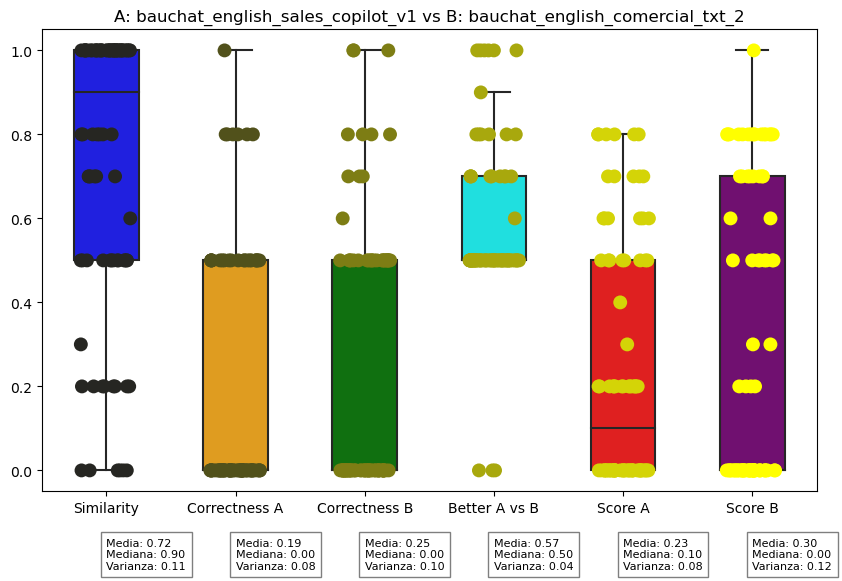

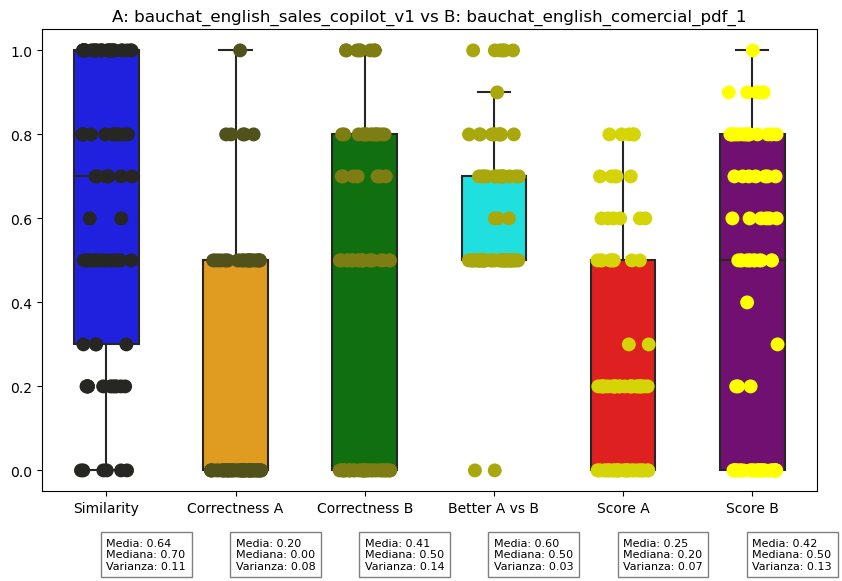

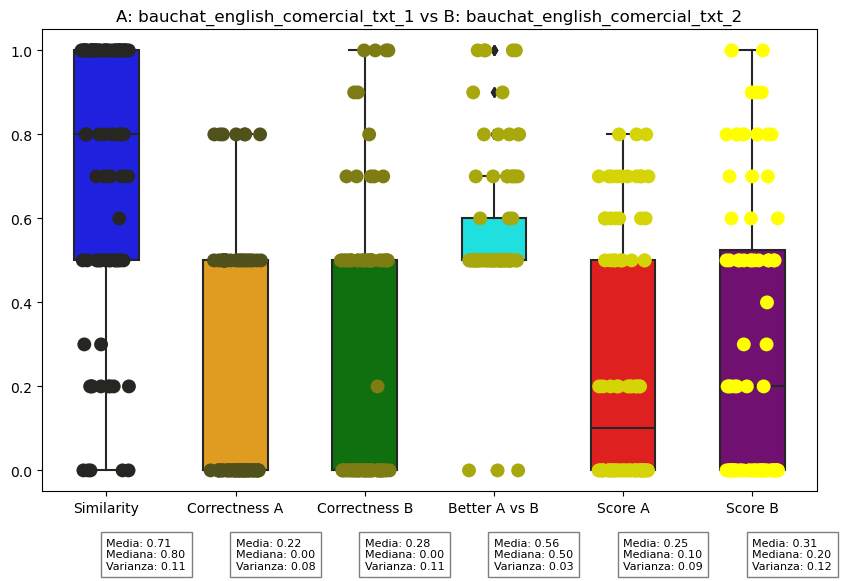

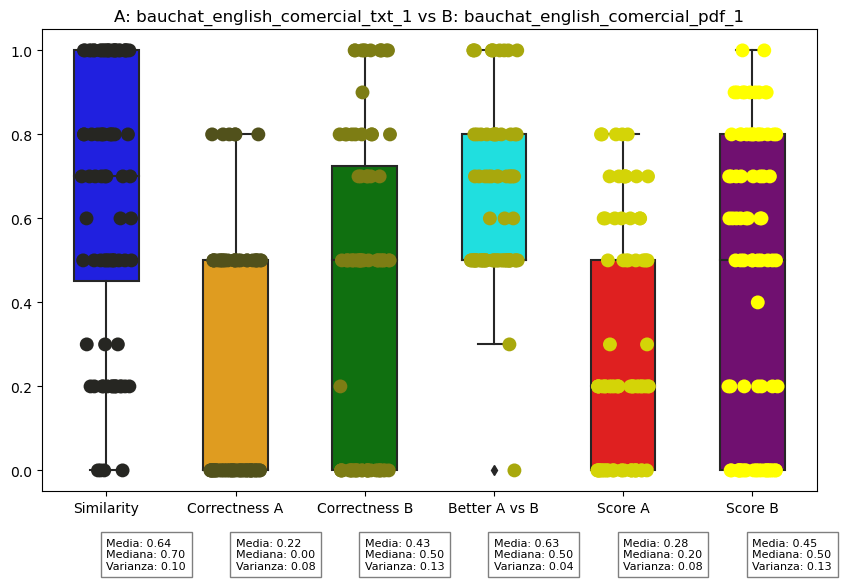

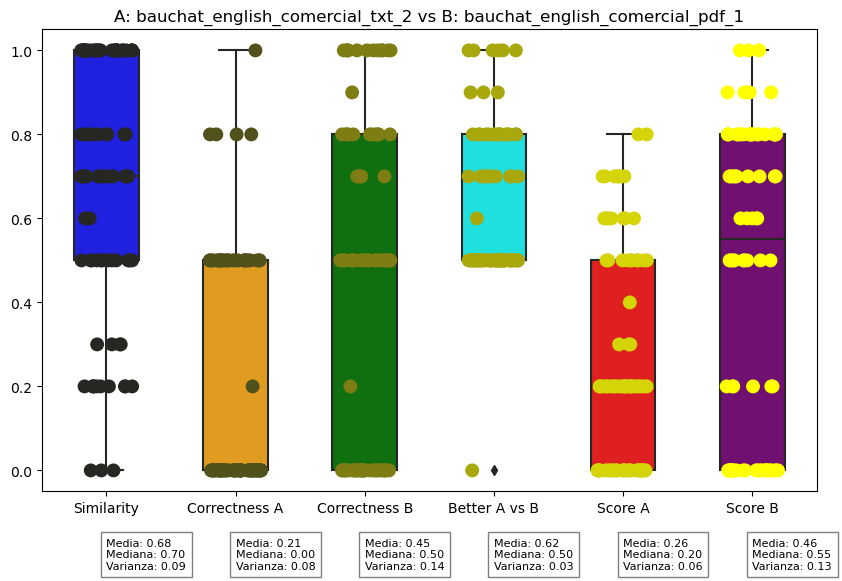

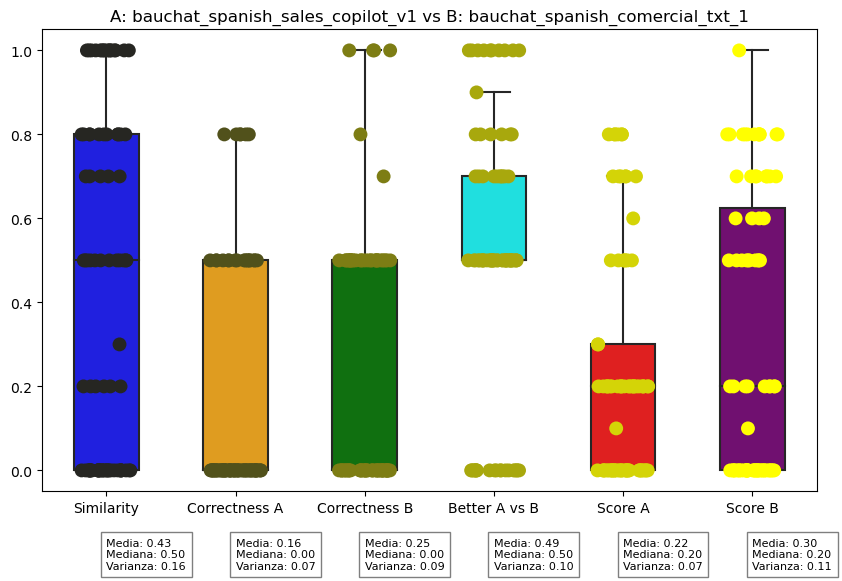

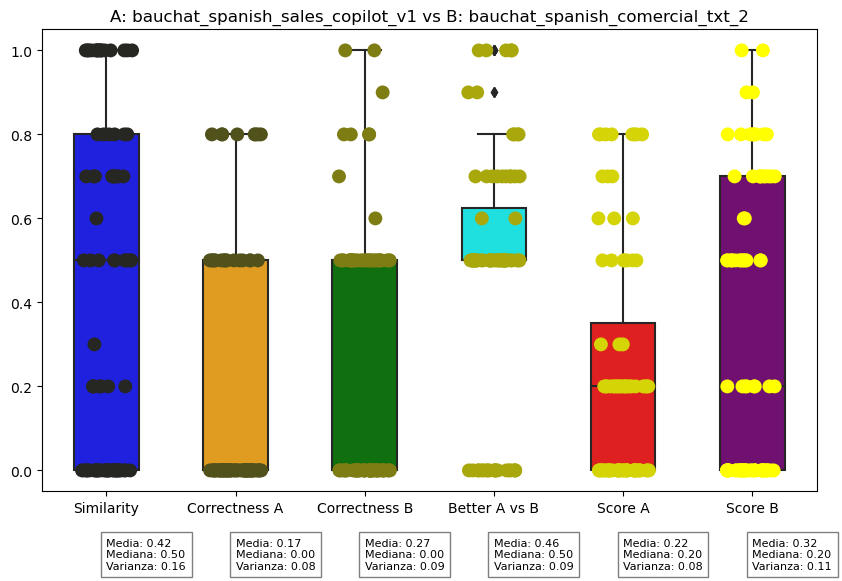

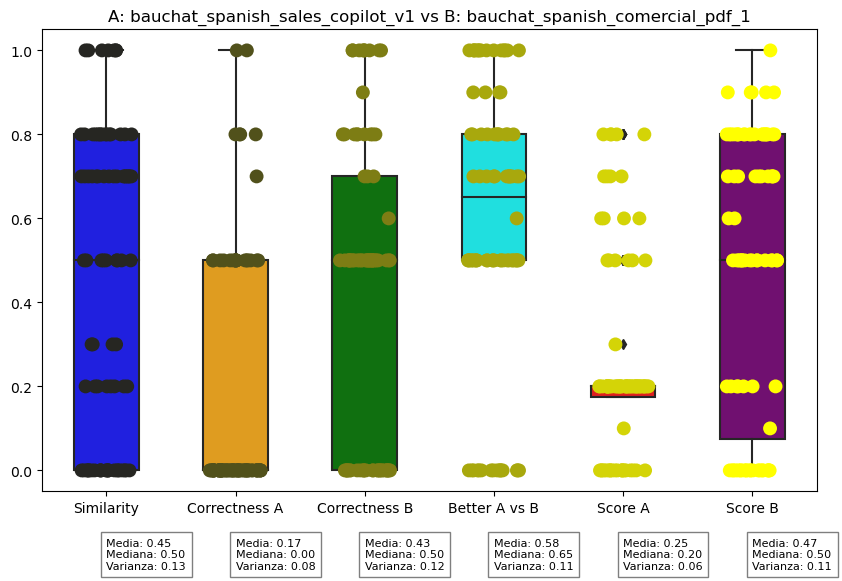

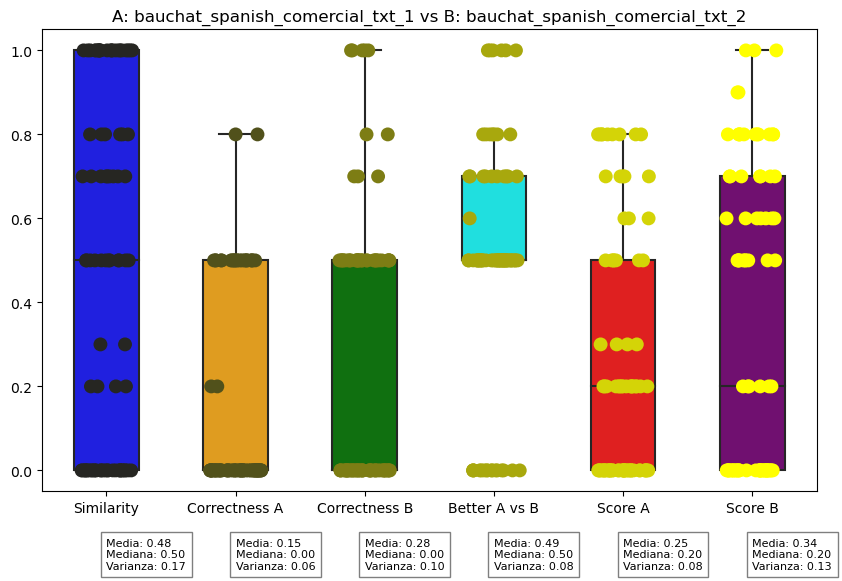

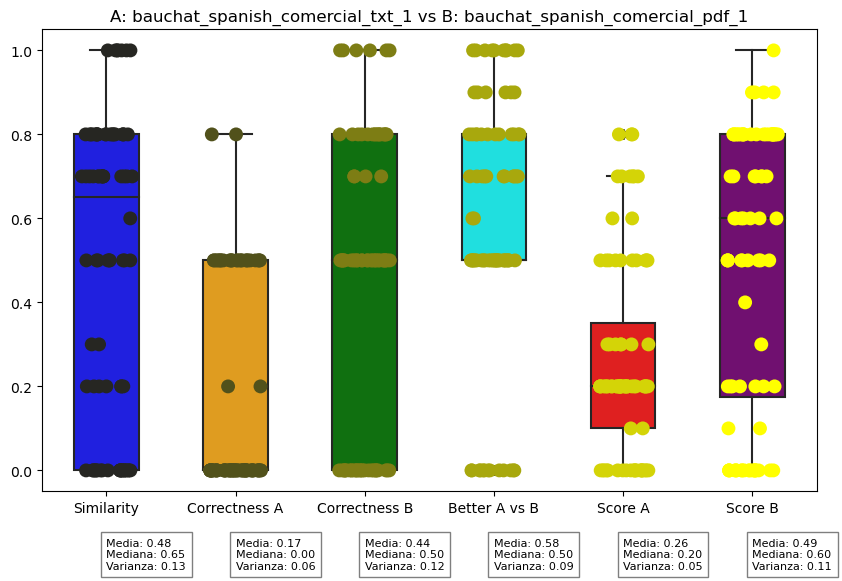

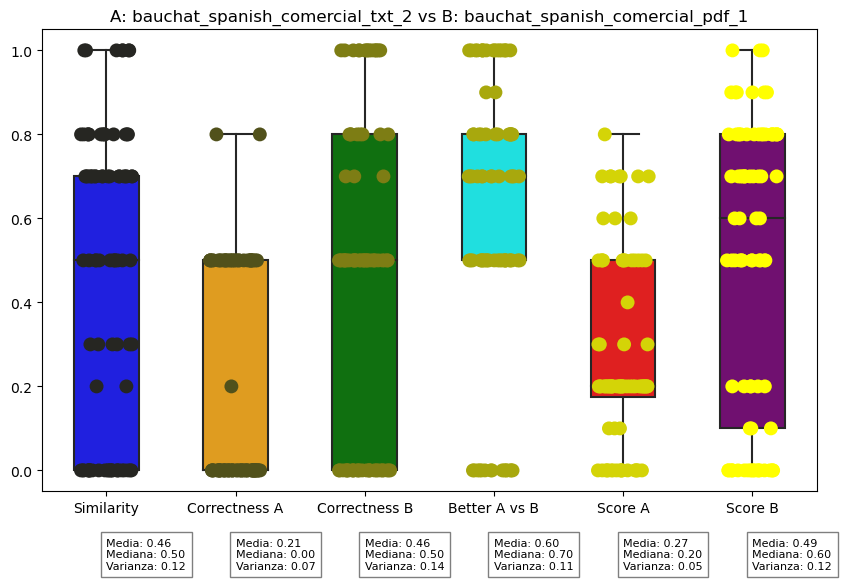

In [8]:
for eval_result in eval_results_vs_index:
    qagraph.show_all_numeric_evaluate_responses_as_box_graph(filename_to_eval=eval_result)
